In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [307]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [308]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [309]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [310]:
def cross_validation(x_train, y_train, k=5):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.

    # TODO HERE
    k_fold_data = []
    
    #shuffle
    np.random.seed(0)
    train_size = np.shape(x_train)[0]
    shuffle_index = np.arange(train_size)
    np.random.shuffle(shuffle_index)
    for i in range(k):
        ##Calculate boundary
        left_bound = np.int64(i*train_size/k)
        right_bound = np.int64((i+1)*train_size/k)
        #Split the training data
        x_train_fold = np.concatenate((x_train[shuffle_index[0:left_bound]],x_train[shuffle_index[right_bound:train_size]]), axis=0)
        y_train_fold = np.reshape(np.concatenate((y_train[shuffle_index[0:left_bound]],y_train[shuffle_index[right_bound:train_size]]), axis=0),(-1,1))
        train_fold = np.concatenate((x_train_fold, y_train_fold), axis=1)
        x_val_fold = x_train[shuffle_index[left_bound: right_bound]]
        y_val_fold = np.reshape(y_train[shuffle_index[left_bound: right_bound]],(-1,1))
        val_fold = np.concatenate((x_val_fold, y_val_fold), axis=1)
        #Pack the data
        kth_data=[]
        kth_data.append(train_fold)
        kth_data.append(val_fold)
        k_fold_data.append(kth_data)
    return k_fold_data

In [311]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [312]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  5  6  7  9 12 13 14 15 16 17 19], Validation index: [ 8 10 11 18]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7  8 10 11 14 15 16 17 18], Validation index: [ 9 12 13 19]
Split: 3, Training index: [ 2  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19], Validation index: [ 0  1  3 15]
Split: 4, Training index: [ 0  1  3  7  8  9 10 11 12 13 14 15 16 17 18 19], Validation index: [2 4 5 6]
Split: 5, Training index: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 15 18 19], Validation index: [ 7 14 16 17]


In [313]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [314]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [315]:
best_c, best_gamma = None, None

# TODO HERE
# k-Flod Cross Validation and Grid Search
#def accuracy_score(y, y_pred):
#    return (y_pred == y).sum()/np.shape(y)[0]

def grid_search( x_train, y_train, c, gamma, k):
    best_c, best_gamma, best_acc = None, None, 0
    kfold_data = cross_validation(x_train, y_train, k)
    total_acc = np.zeros((len(c),len(gamma)))
    for i_th ,c_ in enumerate(c):
        #print("i_th: ", i_th)
        for j_th, gamma_ in enumerate(gamma):
            #print("j_th: ", j_th)
            k_fold_acc = np.zeros(k)
            for k_th , k_th_data in enumerate(kfold_data):
                k_train = k_th_data[0]
                k_val = k_th_data[1]
                clf = SVC(C=c_, gamma=gamma_, kernel='rbf')
                clf.fit(k_train[:,0:-1], np.reshape(k_train[:,-1],-1))
                y_pred = clf.predict(k_val[:,0:-1])
                k_fold_acc[k_th] = accuracy_score(np.reshape(k_val[:,-1],-1), y_pred)
            total_acc[i_th][j_th] = np.average(k_fold_acc)
            #print("total_acc[i_th][j_th]: ", total_acc[i_th][j_th])
            if total_acc[i_th][j_th] >= best_acc:
                best_c = c_
                best_gamma = gamma_
                best_acc = total_acc[i_th][j_th]
    return best_c, best_gamma , total_acc

c = [0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma = [1e-4, 1e-3, 0.01, 0.1, 1, 10, 100, 1000]
#c = [100, 1000]
#gamma = [10, 100]
k = 5
best_c, best_gamma , total_acc = grid_search(x_train, y_train, c, gamma, 5)
best_parameters=(best_c, best_gamma)
#print(total_acc)

In [316]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (10000, 0.0001)


# Q3

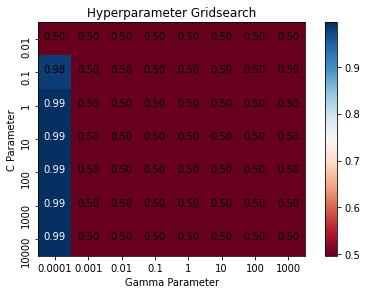

In [317]:
# Plot the grid search results of your SVM

# TODO HERE
def show_grid_search(c, gamma, total_acc):
    threshold = (np.max(total_acc)+np.min(total_acc))/2
    color_range = (np.max(total_acc)-np.min(total_acc))/2
    plt.imshow(total_acc,interpolation='nearest',cmap=plt.cm.RdBu)
    plt.title("Hyperparameter Gridsearch")
    plt.colorbar()
    
    tick_index_gamma = np.arange(len(gamma))
    tick_index_c = np.arange(len(c))
    
    plt.xticks(tick_index_gamma,gamma)
    plt.yticks(tick_index_c,c, rotation=90)
    for i in range(total_acc.shape[0]):
      for j in range(total_acc.shape[1]):
        plt.text(j,i,format(total_acc[i,j], '.2f'),horizontalalignment="center",color="black" if ((total_acc[i,j] > (threshold-color_range))&(total_acc[i,j] < (threshold+color_range))) else "white")
    plt.tight_layout()
    plt.xlabel("Gamma Parameter")
    plt.ylabel("C Parameter")
    plt.show()

show_grid_search(c, gamma, total_acc)

## Q4

In [318]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
